## Decision Trees

In [1]:
import pandas as pd
import numpy as np

In [2]:
hr = pd.read_csv('C:/Users/Administrator/Downloads/HRAnalytics.csv')

In [3]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
# Target column/Output Column/Dependent Variable
# Input COlumn/Independent Variable/Predictors
hr['Attrition'].value_counts() # count of No.of 1's and 0's

0    1233
1     237
Name: Attrition, dtype: int64

In [5]:
hr.shape # No.of.Samples . Every row is a sample

(1470, 35)

In [6]:
hr['Attrition'].value_counts() # percentage of 0's and 1's

0    1233
1     237
Name: Attrition, dtype: int64

In [7]:
#How many numeric col are there
#hr.dtypes
#hr.info()
hr._get_numeric_data().columns  # Function starts with _ , generally not used

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Data Preprocessing
- Missing value Treatment
- Outlier Removal
- COlumn Type COnversion
- Standardization

### Split the data into Train and Test

- BUild models using train data
- Test/Validate the model using test data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
hr.shape
hr.shape[0]*0.7 # Train
hr.shape[0]*0.3 # Test

441.0

In [10]:
np.random.seed(100) # same set of results for everyone
train_rows = np.random.randint(1,hr.shape[0],int(hr.shape[0]*0.7)) # Generate 10 Random Numbers

In [11]:
train =hr.iloc[train_rows] # Index of the rows to be taken for Train data
print(train.shape)
train.head()

(1029, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
793,28,0,Travel_Rarely,895,Research & Development,15,2,Life Sciences,1,1102,...,4,80,1,4,5,2,4,2,2,2
80,30,0,Travel_Rarely,852,Research & Development,1,1,Life Sciences,1,104,...,3,80,2,10,1,2,10,8,3,0
351,32,0,Travel_Rarely,1062,Research & Development,2,3,Medical,1,471,...,3,80,1,8,4,3,8,0,0,7
54,26,0,Travel_Rarely,1443,Sales,23,3,Marketing,1,72,...,3,80,1,5,2,2,2,2,0,0
803,34,0,Non-Travel,697,Research & Development,3,4,Life Sciences,1,1115,...,4,80,3,6,2,3,0,0,0,0


In [18]:
train,test = train_test_split(hr_dummies,test_size = 0.3,random_state = 100) # split to train and test using Inbuilt function
print(train.shape) 
print(test.shape)
train.head()

(1029, 56)
(441, 56)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
178,46,0,526,1,2,1,244,2,92,3,...,0,0,1,0,1,0,0,1,1,0
971,51,0,1405,11,2,1,1367,4,82,2,...,0,0,0,0,0,0,1,1,1,0
1172,29,0,469,10,3,1,1650,3,42,2,...,0,0,1,0,0,0,1,1,1,0
667,41,1,1085,2,4,1,927,2,57,1,...,0,0,0,0,1,0,0,1,0,1
399,31,0,329,1,2,1,530,4,98,2,...,0,0,0,0,0,1,0,1,1,0


In [19]:
# seperate input and output , attrition column alone output , for input drop the attrition column and pass the rest as input
train_y = train['Attrition']  # Defining Output column
test_y = test['Attrition']   # defining output column
train_x =train.drop('Attrition',axis = 1) # defining input column
test_x = test.drop('Attrition',axis = 1)  # Defining Input column (drop the output column)
train_x.shape

(1029, 55)

In [20]:
print(train_y.shape)
print(test_y.shape)
print(train_x.shape)
print(test_x.shape)

(1029,)
(441,)
(1029, 55)
(441, 55)


## Building Model

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier() #objcet of the model we want (OOPS concept)
model 
#Invoke the function first then we can predict using model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
# convert category to numeric
hr_dummies = pd.get_dummies(hr)
hr_dummies
print()

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
model = DecisionTreeClassifier() # add random_state = 100
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
test_pred = model.predict(test_x)
print(len(test_pred))
test_pred

441


array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,

### Evaluate Model Performance

In [29]:
#Now we will have 441 predicted values and 441 test_y values.
df_pred = pd.DataFrame({'actual':test_y,'Predicted':test_pred})
df_pred.head()

,actual,Predicted
880,0,1
152,0,1
1466,0,0
1084,0,0
1086,0,0


In [30]:
df_pred['pred_status'] = df_pred['actual']==df_pred['Predicted'] # create a dataframe for same values of actual and predicted 
df_pred.head()

,actual,Predicted,pred_status
880,0,1,False
152,0,1,False
1466,0,0,True
1084,0,0,True
1086,0,0,True


In [31]:
df_pred['pred_status'].value_counts()

True     342
False     99
Name: pred_status, dtype: int64

### Machine Learning Process
- Clean and Prepare the data (EDA Process)
    - Missing value treatment
    - Outlier Removal
    - Standardization
    - Dummy Variable conversion
- Split the data into train and test
- Seperate the input and output variables(train_x,train_y,test_X,test_y)
- Build model using training data
- Predict the output values for the test data
- Evaluate the model
    - Accuracy,Sensitivity,Specificity
- Fine tune the model for better performance
    - Hyper paramter tuning,cross validation

### Bank DataSet

In [32]:
bank = pd.read_csv('D:/Datasets/bank-full.csv',sep=';')
bank.shape

(45211, 17)

In [33]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
# Alternate method
#bank_dummy = bank.drop('y',axis = 1)
#dummies_bank = pd.get_dummies(bank_dummy)

In [35]:
bank_dummy = pd.get_dummies(bank.drop('y',axis =1))
bank_dummy['y'] = bank['y']
bank_dummy.shape

(45211, 52)

In [36]:
# split the data into test and train
train_bank,test_bank = train_test_split(bank_dummy,test_size = 0.3,random_state = 100) # split to train and test using Inbuilt function
print(train_bank.shape) 
print(test_bank.shape)
train_bank.head()

(31647, 52)
(13564, 52)


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
18391,40,4853,31,234,2,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,no
13056,26,-378,8,165,1,-1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,no
13415,52,3440,9,194,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,no
21022,39,668,14,297,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,no
24510,50,830,17,71,1,138,2,0,0,0,...,0,0,1,0,0,1,0,0,0,no


In [37]:
# Input and output for test and  train
train_y1 = train_bank['y']  # Defining Output column
test_y1 = test_bank['y']   # defining output column
train_x1 =train_bank.drop('y',axis = 1) # defining input column
test_x1 = test_bank.drop('y',axis = 1)  # Defining Input column (drop the output column)
train_x1.shape

(31647, 51)

In [38]:
model_bank = DecisionTreeClassifier(random_state=100) # add random_state = 100
model_bank.fit(train_x1,train_y1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [39]:
test_pred1 = model_bank.predict(test_x1)
print(len(test_pred1))
test_pred1

13564


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [40]:
df_pred1 = pd.DataFrame({'actual':test_y1,'Predicted':test_pred1})
df_pred1.head()

,actual,Predicted
14789,no,no
8968,no,no
34685,no,no
2369,no,no
36561,no,yes


In [41]:
df_pred1['pred_status'] = df_pred1['actual']==df_pred1['Predicted'] # create a dataframe for same values of actual and predicted 
df_pred1.head()

,actual,Predicted,pred_status
14789,no,no,True
8968,no,no,True
34685,no,no,True
2369,no,no,True
36561,no,yes,False


In [42]:
df_pred1['pred_status'].value_counts()

True     11899
False     1665
Name: pred_status, dtype: int64

In [43]:
df_pred1['pred_status'].value_counts() / df_pred1.shape[0]*100 

True     87.72486
False    12.27514
Name: pred_status, dtype: float64

### Gini Impurity for HR data

In [44]:
train_y.shape
train_y[train_y==0].shape[0]

862

In [45]:
train_y[train_y==1].shape[0]

167

In [46]:
1-np.square(862/1029)-np.square(167/1029)

0.27190862461880494

### Gini Impurity for Bank Data

In [47]:
print(train_y1.shape)
train_y1[train_y1 =='no'].shape[0]

(31647,)


27937

In [48]:
train_y1[train_y1 =='yes'].shape[0]

3710

In [49]:
1-np.square(27937/31647)-np.square(3710/31647)

0.20697532774991265

## HR Gini

In [50]:
females = train[train['Gender_Female']==1 ]
females.shape

(419, 56)

In [51]:
females['Attrition'].value_counts()

0    357
1     62
Name: Attrition, dtype: int64

In [52]:
males = train[train['Gender_Female']==0]
print(males.shape)
males['Attrition'].value_counts()

(610, 56)


0    505
1    105
Name: Attrition, dtype: int64

In [53]:
# Gini Index for Overtime in that Attrition
ot = train[train['OverTime_No']==0]
print(ot.shape)
ot['Attrition'].value_counts()

(289, 56)


0    197
1     92
Name: Attrition, dtype: int64

In [54]:
1-np.square(197/289)-np.square(92/289)

0.4339986350738138

In [55]:
ot = train[train['OverTime_No']==1]
print(ot.shape[0])
ot['Attrition'].value_counts()

740


0    665
1     75
Name: Attrition, dtype: int64

In [56]:
1-np.square(665/740)-np.square(75/740)

0.18215850986121246

In [57]:
a = train['MonthlyIncome'].unique() #min,#max,#unique values
a.shape[0]
# we can use range function also or np.sort(train['MonthlyIncome'])

968

In [58]:
#Sort values , take midpoints from successor values, they are called cuts

## Nov 13 - Decision tree-Gini Impurity- contd.

In [59]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [60]:
hr_dummies = pd.get_dummies(hr)
train,test =train_test_split(hr_dummies,test_size = 0.3,random_state =100)

In [61]:
mi_uniqs = np.unique(train['MonthlyIncome'])
cuts = pd.Series(mi_uniqs).rolling(2).mean()[1:]
cuts.head()
# rolling(2) -> takes 2 values consecutive and finds the mean.
# called asRolling Mean/Moving Average

1    1030.0
2    1066.0
3    1086.0
4    1096.5
5    1110.0
dtype: float64

In [62]:
# consider cut = 1086

cut = 1086

samples_left = train[train['MonthlyIncome'] < cut]   # monthly income less and greater
samples_right = train[train['MonthlyIncome'] > cut]

nparent = train.shape[0]
nleft = samples_left.shape[0]     #number of values on left
nright = samples_right.shape[0]   # number of values on right
print(nparent,nleft,nright)

p0_left = samples_left[samples_left['Attrition']==0].shape[0]/nleft # no of vars on left where attrition is 0
p1_left = samples_left[samples_left['Attrition']==1].shape[0]/nleft  #No of vars where attrition is 1

p0_right = samples_right[samples_right['Attrition']==0].shape[0]/nright # No of vars on right where attrition is 0
p1_right = samples_right[samples_right['Attrition']==1].shape[0]/nright # No of vars on right where attrition is 1

gi_left  = 1-np.square(p0_left)-np.square(p1_left)           # formula for GI
gi_right = 1-np.square(p0_right)-np.square(p1_right)

gi_cut = (nleft/nparent*gi_left) + (nright/nparent*gi_right) # Overall GI formula
print(gi_cut)

1029 3 1026
0.2704209503350212


In [63]:
# Using for Loop for the above

df_gi_cuts = pd.DataFrame(columns=['cut','gi'])
for cut in cuts:
    
    samples_left = train[train['MonthlyIncome'] < cut]   # monthly income less and greater
    samples_right = train[train['MonthlyIncome'] > cut]

    nparent = train.shape[0]
    nleft = samples_left.shape[0]     #number of values on left
    nright = samples_right.shape[0]   # number of values on right
    #print(nparent,nleft,nright)

    p0_left = samples_left[samples_left['Attrition']==0].shape[0]/nleft # no of vars on left where attrition is 0
    p1_left = samples_left[samples_left['Attrition']==1].shape[0]/nleft  #No of vars where attrition is 1

    p0_right = samples_right[samples_right['Attrition']==0].shape[0]/nright # No of vars on right where attrition is 0
    p1_right = samples_right[samples_right['Attrition']==1].shape[0]/nright # No of vars on right where attrition is 1

    gi_left  = 1-np.square(p0_left)-np.square(p1_left)           # formula for GI
    gi_right = 1-np.square(p0_right)-np.square(p1_right)

    gi_cut = (nleft/nparent*gi_left) + (nright/nparent*gi_right) # Overall GI formula
    df_gi_cuts = df_gi_cuts.append({'cut':cut,'gi':gi_cut},ignore_index = True)
    #print(gi_cut)
df_gi_cuts.head()

,cut,gi
0,1030.0,0.270543
1,1066.0,0.271464
2,1086.0,0.270421
3,1096.5,0.269213
4,1110.0,0.267937


In [64]:
# Sort them 
df_gi_cuts.sort_values(by=['gi'])

,cut,gi
202,2779.5,0.254494
203,2781.5,0.254687
185,2693.5,0.254709
143,2489.5,0.254749
199,2766.0,0.254780
178,2658.0,0.254846
204,2782.5,0.254878
186,2694.5,0.254913
200,2773.5,0.254972
183,2683.5,0.254986


In [65]:
# passing one parameter to Decision tree
train_y = train['Attrition'] 
test_y = test['Attrition']
train_x = train[['MonthlyIncome']]
test_y = train[['MonthlyIncome']]

model = DecisionTreeClassifier(random_state = 100,max_depth = 1)
model.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [66]:
from sklearn import tree
with open("model.dot","w") as f:
    f = tree.export_graphviz(model,out_file = f,feature_names = train_x.columns)
    
# a dot file is created in the working directory, open it online to get the graph

#Decision Tree uses Recursive Partitioning 

In [67]:
import os
os.getcwd()

'C:\\Users\\Administrator'

### Building Decision tree for Bank DataSet

In [68]:
model_bank = DecisionTreeClassifier(random_state=100,max_depth=3) # add random_state = 100
model_bank.fit(train_x1,train_y1)
from sklearn import tree
with open("model.dot","w") as f:
    f = tree.export_graphviz(model_bank,out_file = f,feature_names = train_x1.columns)

In [69]:
# install 
!pip install pydotplus

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [73]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image

import os
graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
os.environ["PATH"] += os.pathsep + graphviz_path # Adding the path to environment variables

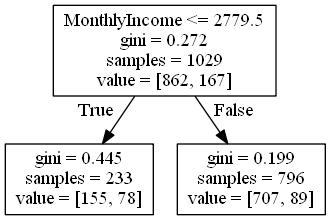

In [74]:
dot_data = StringIO() # stores the copied content in the variable 
tree.export_graphviz(model,out_file = dot_data,feature_names =train_x.columns)#taking that stored content and plotting graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) # get the contents of the stored file
Image(graph.create_png()) # Image function is in IPython for displaying the output

# make the above as a function

### Writing the above code as a function for plotting TREE

In [78]:
# Writing as a function for the above
def draw_tree(model,columns):
    import pydotplus
    from sklearn.externals.six import StringIO
    from IPython.display import Image

    import os
    graphviz_path = 'C:\Program Files (x86)\Graphviz2.38/bin/'
    os.environ["PATH"] += os.pathsep + graphviz_path # Adding the path to environment variables
    
    dot_data = StringIO() # stores the copied content in the variable 
    tree.export_graphviz(model,out_file = dot_data,feature_names =train_x.columns)#taking that stored content and plotting graph
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) # get the contents of the stored file
    return Image(graph.create_png()) # Image function is in IPython for displaying the output


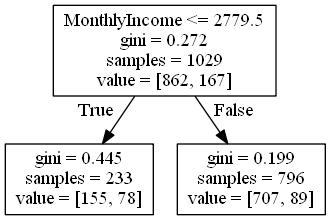

In [79]:
draw_tree(model,train_x.columns)

In [80]:
#os.environ['PATH']
#os.pathsep

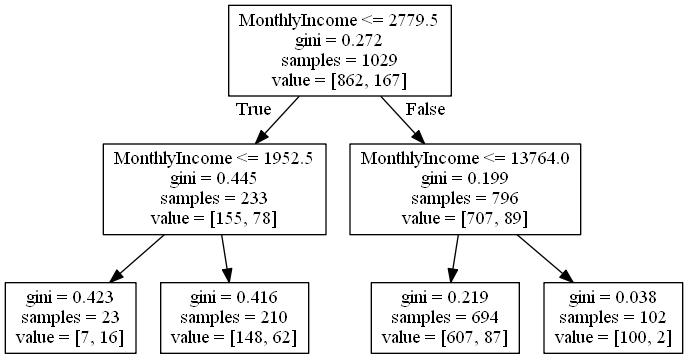

In [81]:
# giving some value for max_depth more than 1
# as samples differ Gini INdex is calculated for every split by algorithm.
# every node the algorithm will decide which parameter to split 
model2 = DecisionTreeClassifier(max_depth = 2,random_state = 2)
model2.fit(train_x,train_y)
draw_tree(model2,train_x.columns)

In [ ]:
# Instead of the predict function we can also use the function to get the probability values  instead of 0 and 1
#pd.DataFrame(model2.predict_proba(test_x)).head()
# to Fine tune the model probability values are needed.

#  Find P(0) and P(1)

# EmpNO 880 MonthINcome 2745 Ovetime_no 1
#P(0) = 110/131 =>0.84 and P(1) = 21/131 =>0.16

###RANDOM FOREST

In [88]:
all_cols = train.drop('Attrition',axis = 1).columns
cols_used = all_cols[np.random.randint(1,len(all_cols),3)] # index of the ccolumns from 1 to length of the train data
print(cols_used)

train_y = train['Attrition']
test_y = test['Attrition']

train_x = train[cols_used]
test_x = test[cols_used]

model = DecisionTreeClassifier(random_state = 100)
model.fit(train_x,train_y)
pd.DataFrame(model.predict(test_x),index = test.index,columns = ['Attrition_Predicted'])

Index(['OverTime_No', 'PercentSalaryHike', 'JobLevel'], dtype='object')


,Attrition_Predicted
880,0
152,0
1466,0
1084,0
1086,0
1392,0
57,1
956,0
1400,1
1175,0


In [ ]:
# EMp 880 , 35 Decision Trees ,

In [96]:
# Abovve code explained:
all_cols = train.drop('Attrition',axis = 1).columns
np.random.randint(1,len(all_cols),3)

array([46,  8, 11])

In [98]:
# Random Forest
train_y = train['Attrition']
test_y = test['Attrition']

train_x = train.drop('Attrition',axis = 1)
test_x = test.drop('Attrition',axis = 1)

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 100)
model_rf.fit(train_x,train_y)

test_pred = model_rf.predict(test_x)
df_pred = pd.DataFrame({'actual':test_y,'predicted':test_pred})

df_pred['pred_status'] = df_pred['actual'] == df_pred['predicted']
df_pred['pred_status'].sum() / df_pred.shape[0]*100

85.71428571428571